In [3]:
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [186]:
def f(x, t):
    return (x-1)/(t*(x-1)+1)
def g(x):
    return ((x-1)*(x+5))/(2+4*x)

/tmp/ipykernel_244841/1987178609.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(xs, sum(W *(2**2)* f(xs**(1/2**2),T) for T,W in zip(t,w))-np.log(xs),label='f')
/tmp/ipykernel_244841/1987178609.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(xs, (2**1)*g(xs**(1/2**1))-np.log(xs),label='g')


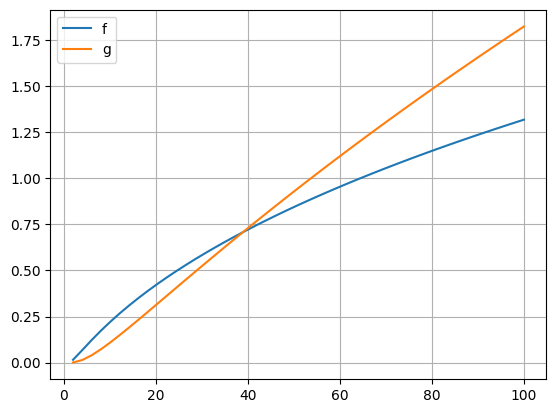

In [198]:
xs = np.linspace(0,100)
t,w = sp.special.roots_sh_legendre(2)
t[0] = 0
plt.plot(xs, sum(W *(2**2)* f(xs**(1/2**2),T) for T,W in zip(t,w))-np.log(xs),label='f')
plt.plot(xs, (2**1)*g(xs**(1/2**1))-np.log(xs),label='g')
plt.grid()
plt.legend()
plt.show()

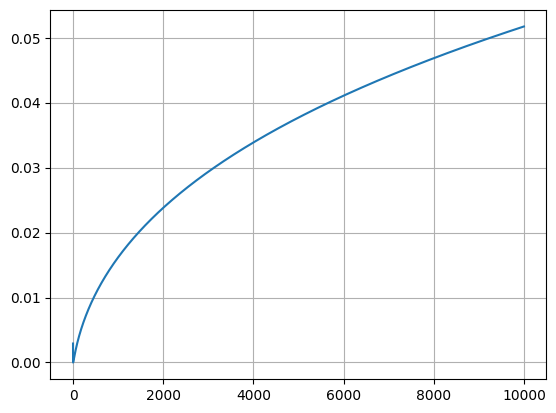

In [31]:
xs = np.linspace(0.01,10000,num=10000)
plt.plot(xs,2**4 * g(xs **(1/2**4),0)-np.log(xs))
plt.grid()
plt.show()

In [101]:
X = cp.Variable()
T = cp.Parameter()
A = cp.bmat([[X-1-T,-np.sqrt(0.2)*T],
             [-np.sqrt(0.2)*T, 1- 0.2*T]])
prob = cp.Problem(cp.Minimize(X), [A >> 0])
T.value = 1
print(prob.solve())
print(X.value)
print(f(X.value, 0.2, T.value))

2.249999999234903
2.249999999234903
7.650968747441311e-10


In [184]:
X = cp.Variable()
T = cp.Parameter()
# H = cp.Parameter(pos=True)
A = cp.bmat([[X-1-T,-np.sqrt(3)*T],
             [-np.sqrt(3)*T, X+5-3*T]])
prob = cp.Problem(cp.Minimize(X), [A >> 0])
Y = 2
T.value = np.log(Y)
# H.value = 2 ** 1
print(prob.solve())
print(X.value)
print(g(X.value, 0)-np.log(Y))

1.9868575661024572
1.9868575661024572
1.0853119514209197e-09


In [77]:
def h(t, tau):
    return (1+tau-t*tau)/(1-t*tau)
h(0.2,-1)

0.16666666666666669

In [76]:
sp.optimize.fsolve(f,x0=0.16,args=(0.2,-1))

array([0.25])

In [70]:
f(,0.2,-1)

0.07692307692307687